<a href="https://colab.research.google.com/github/joaovictor-loureiro/data-science/blob/master/Case_1_(Python).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [153]:
# Importando o dataset
df = pd.read_csv('customer_vendas.csv', sep=';')

In [154]:
# Verificando os dados
df.head()

,Número de registros,Age,City,Customer Id,Date,Id (Operations),Id,Scholarship,Sex,Value
0,1,25,São Paulo,18,09/05/2018,1,18,Ensino Superior,F,"798,76"
1,1,28,Mato Grosso,4,12/04/2018,2,4,Ensino Superior,M,"383,87"
2,1,37,Rio de Janeiro,39,02/05/2018,3,39,Ensino Médio,M,"595,83"
3,1,43,São Paulo,14,07/07/2018,4,14,Ensino Médio,F,"954,76"
4,1,30,Rio de Janeiro,2,16/04/2018,5,2,Ensino Superior,M,"267,24"


In [155]:
# Verificando as dimensões do dataset
print('Número de colunas(variáveis): %d' % df.shape[1])
print('Número de linhas(entradas): %d' % df.shape[0])

Número de colunas(variáveis): 10
Número de linhas(entradas): 497


In [156]:
# Verificando o tipo dos dados
df.dtypes

Número de registros     int64
Age                     int64
City                   object
Customer Id             int64
Date                   object
Id (Operations)         int64
Id                      int64
Scholarship            object
Sex                    object
Value                  object
dtype: object

In [157]:
# Convertendo a variável 'Value' para o tipo float
df['Value'] = df['Value'].str.replace(',', '.').astype(float)

In [158]:
# Convertendo a variável 'Date' para o tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

In [159]:
# Verificando a existência de registros nulos
df.isnull().sum()

Número de registros    0
Age                    0
City                   0
Customer Id            0
Date                   0
Id (Operations)        0
Id                     0
Scholarship            0
Sex                    0
Value                  0
dtype: int64

In [160]:
# Resumo estatístico descritivo das variáveis numéricas
df.describe()

,Número de registros,Age,Customer Id,Id (Operations),Id,Value
count,497.0,497.000000,497.000000,497.000000,497.000000,497.000000
mean,1.0,35.376258,25.213280,249.000000,25.213280,588.045976
std,0.0,8.295529,14.771062,143.615807,14.771062,266.411618
min,1.0,19.000000,1.000000,1.000000,1.000000,-84.480000
25%,1.0,28.000000,12.000000,125.000000,12.000000,411.500000
50%,1.0,37.000000,24.000000,249.000000,24.000000,565.670000
75%,1.0,41.000000,39.000000,373.000000,39.000000,761.780000
max,1.0,50.000000,50.000000,497.000000,50.000000,1443.370000


In [161]:
# Verificando quantos entradas possuem 'Value' negativo (indício de outlier)
for n in list(df['Value']):
  if n < 0:
    print(n)

-84.48


In [162]:
# Identificando e removendo a entrada com 'Value' negativo, visto que, é um outlier
print('LINHA REMOVIDA: {}'.format(df.loc[df['Value'] == -84.48].index))
df.drop([438], inplace=True)

LINHA REMOVIDA: Int64Index([438], dtype='int64')


In [163]:
# Definindo um estilo para os gráficos
plt.style.use('fivethirtyeight')

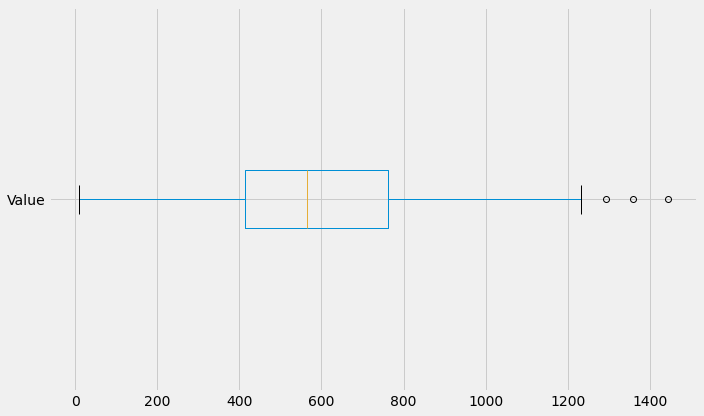

In [164]:
# Boxplot da variável 'Value' para verificar a existência de outros outliers
fig, ax = plt.subplots(figsize=(10, 6))

df['Value'].plot(kind='box', vert=False);
ax.set_title('')

plt.tight_layout()
plt.show()

In [165]:
# Utilizando a Regra do IQR Score para eliminar os outliers
Q1_value = df['Value'].quantile(.25)
Q3_value = df['Value'].quantile(.75)
IQR_value = Q3_value - Q1_value
print("IQR da variável 'value': ", IQR_value)

# Definindo os limites                                     
SUP_value = Q3_value + 1.5 * IQR_value
INF_value = Q1_value - 1.5 * IQR_value
print('\nLimite superior: ', SUP_value)
print('Limite inferior: ', INF_value)

IQR da variável 'value':  348.0675

Limite superior:  1284.0237499999998
Limite inferior:  -108.24624999999992


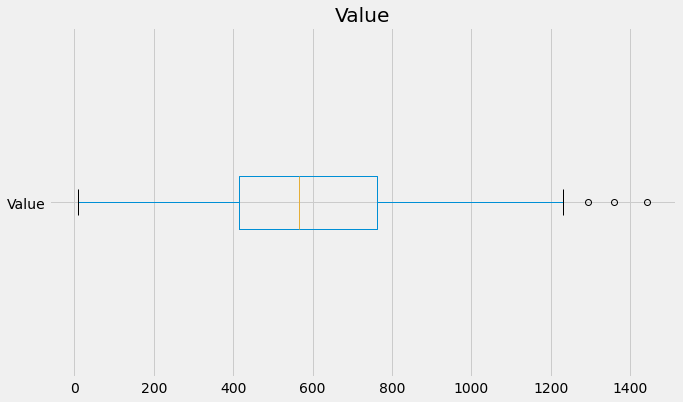


3 entradas acima de 1284,02.
Isso representa 0.60% do dataset.


In [166]:
# Verificando o boxplot de 'Value' no conjunto original
fig, ax = plt.subplots(figsize=(10, 6))

df['Value'].plot(kind='box', vert=False);
ax.set_title('Value')

plt.show()

print("\n{} entradas acima de 1284,02.".format(len(df[df['Value'] > 1284.02])))
print("Isso representa {:.2f}% do dataset.".format((len(df[df['Value'] > 1284.02]) / df.shape[0])*100))

In [167]:
# Limpando os outliers
df['Value'] = df['Value'].drop(df[df['Value'] > 1284.02].index, axis=0)
df.dropna(axis=0, inplace=True)

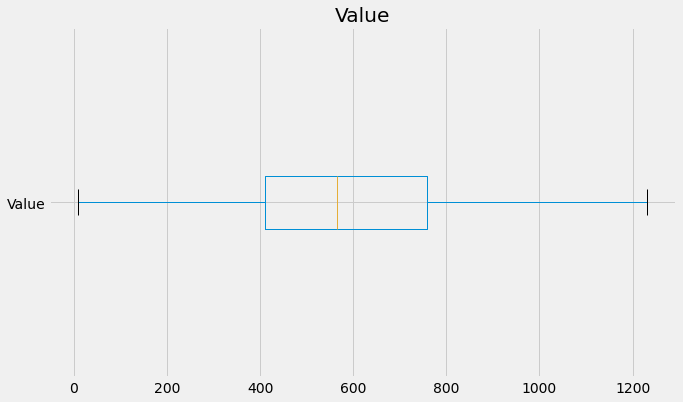

In [168]:
# Verificando o boxplot de 'Value'após a limpeza dos outliers
fig, ax = plt.subplots(figsize=(10, 6))

df['Value'].plot(kind='box', vert=False);
ax.set_title('Value')

plt.show()

In [169]:
# Resumo estatístico descritivo das variáveis numéricas após a limpeza dos outliers
df.describe()

,Número de registros,Age,Customer Id,Id (Operations),Id,Value
count,493.0,493.000000,493.000000,493.000000,493.000000,493.000000
mean,1.0,35.306288,25.296146,249.326572,25.296146,584.678824
std,0.0,8.274600,14.783448,143.605875,14.783448,258.674878
min,1.0,19.000000,1.000000,1.000000,1.000000,8.690000
25%,1.0,28.000000,12.000000,126.000000,12.000000,411.500000
50%,1.0,36.000000,24.000000,250.000000,24.000000,564.940000
75%,1.0,41.000000,39.000000,373.000000,39.000000,759.110000
max,1.0,50.000000,50.000000,497.000000,50.000000,1231.760000


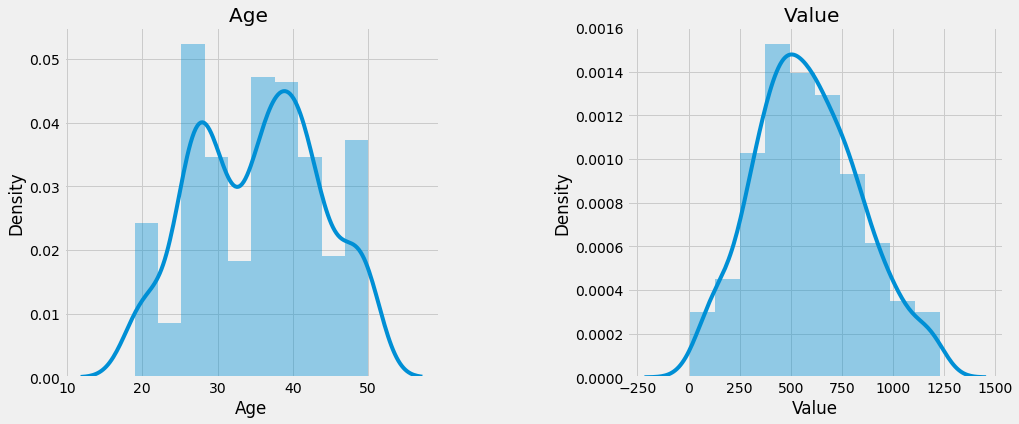

In [170]:
# Verificando a distribuição dos dados
plt.figure(1 , figsize = (15 , 6))

n = 0 
for x in ['Age' , 'Value']:
    n += 1
    plt.subplot(1 , 2 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 10)
    plt.title('{} '.format(x))

plt.show()

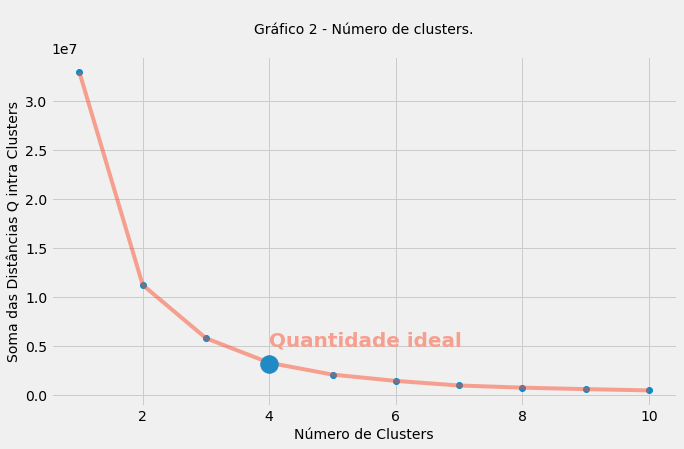

In [180]:
# Selecionando o número de clusters através do método Elbow (Soma das distâncias quadráticas intra clusters):
fig, ax = plt.subplots(figsize=(10, 6))

X2 = df[['Age' , 'Value']].iloc[: , :].values

inertia = []

for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters', fontsize=14)
plt.ylabel('Soma das Distâncias Q intra Clusters', fontsize=14)
plt.title('\nGráfico 2 - Número de clusters.\n', fontsize=14)

ax.plot(4, 3250000, ".r", markersize=35, color='#208ac5')
ax.annotate('Quantidade ideal', fontsize=20, weight='bold', xy=(4, 5000000), color='#f69f8f', ha='left')

plt.show()

# Exportando o gráfico como imagem
fig.savefig('número-de-clusters.png', bbox_inches='tight', dpi=300)

In [176]:
# Iniciando o KMeans com o valor de 4 clusters
algorithm = (KMeans(n_clusters = 4))
algorithm.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

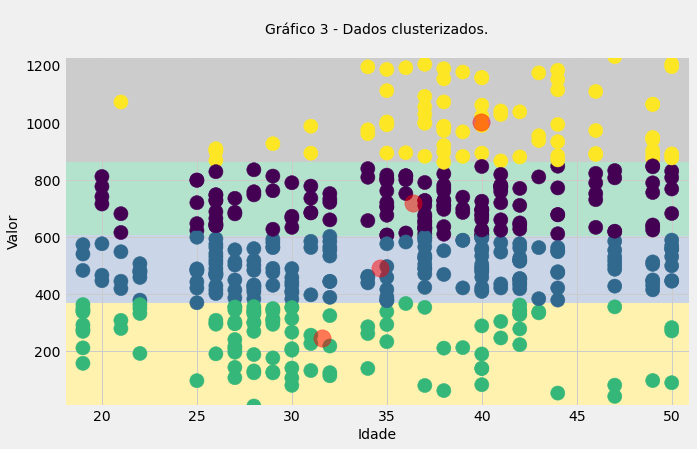

In [179]:
# Visualizando os clusters criados
fig, ax = plt.subplots(figsize=(10, 6))

labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'Age' ,y = 'Value' , data = df , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Valor', fontsize=14)
plt.xlabel('Idade', fontsize=14)
plt.title('\nGráfico 3 - Dados clusterizados.\n', fontsize=14)


plt.show()

# Exportando o gráfico como imagem
fig.savefig('dados-clusterizados.png', bbox_inches='tight', dpi=300)

In [181]:
# Criando a variável 'Cluster' que identifica a qual grupo/cluster cada registro pertence
df["Cluster"] = algorithm.labels_

In [182]:
# Ver os dados
df

,Número de registros,Age,City,Customer Id,Date,Id (Operations),Id,Scholarship,Sex,Value,Cluster
0,1,25,São Paulo,18,2018-09-05,1,18,Ensino Superior,F,798.76,0
1,1,28,Mato Grosso,4,2018-12-04,2,4,Ensino Superior,M,383.87,1
2,1,37,Rio de Janeiro,39,2018-02-05,3,39,Ensino Médio,M,595.83,3
3,1,43,São Paulo,14,2018-07-07,4,14,Ensino Médio,F,954.76,7
4,1,30,Rio de Janeiro,2,2018-04-16,5,2,Ensino Superior,M,267.24,5
...,...,...,...,...,...,...,...,...,...,...,...
492,1,43,São Paulo,14,2018-12-04,493,14,Ensino Médio,F,810.73,0
493,1,37,São Paulo,24,2018-06-06,494,24,Ensino Superior,F,1204.99,2
494,1,42,São Paulo,12,2018-04-17,495,12,Ensino Médio,M,328.79,1
495,1,34,São Paulo,13,2018-11-06,496,13,Ensino Médio,F,140.15,9


In [183]:
# Excluindo as colunas que não foram utilizadas e agrupando os dados de acordo com seus cluters
df_group = df.drop(["Número de registros", "Customer Id", 'Date', 'Id (Operations)', 'Id'],axis=1).groupby("Cluster")

In [184]:
# Estatística descritiva dos grupos/segmentos criados
df_group.describe()

Age                       ...     Value                    
        count       mean       std  ...       50%        75%      max
Cluster                             ...                              
0        66.0  35.530303  7.638404  ...   760.240   789.8600   815.00
1        63.0  30.714286  7.269975  ...   342.190   359.5900   390.55
2        19.0  40.894737  5.032061  ...  1177.860  1194.5400  1231.76
3        71.0  36.140845  8.711726  ...   556.930   576.9200   599.70
4        40.0  39.900000  7.983316  ...   881.685   894.0925   934.01
5        29.0  31.517241  8.458388  ...   223.530   267.2400   283.05
6        65.0  36.323077  7.167870  ...   646.060   677.9000   699.19
7        31.0  39.645161  6.107637  ...   994.440  1034.0550  1073.29
8        83.0  33.638554  8.646977  ...   449.910   477.5800   501.35
9        26.0  34.269231  8.190520  ...   111.190   132.5125   158.14

[10 rows x 16 columns]

In [185]:
# Ver os dados
df_group.head()

,Age,City,Scholarship,Sex,Value,Cluster
0,25,São Paulo,Ensino Superior,F,798.76,0
1,28,Mato Grosso,Ensino Superior,M,383.87,1
2,37,Rio de Janeiro,Ensino Médio,M,595.83,3
3,43,São Paulo,Ensino Médio,F,954.76,7
4,30,Rio de Janeiro,Ensino Superior,M,267.24,5
5,36,Pará,Ensino Superior,F,815.00,0
6,28,São Paulo,Ensino Médio,F,483.86,8
7,40,Rio Grande do Sul,Ensino Superior,M,139.76,9
8,34,São Paulo,Ensino Superior,F,286.15,1
9,25,São Paulo,Ensino Superior,F,421.73,8


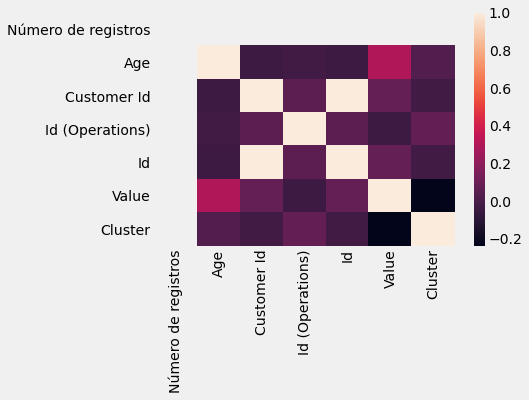

In [186]:
# Matriz de correlação dos dados
sns.heatmap(df.corr())

plt.show()

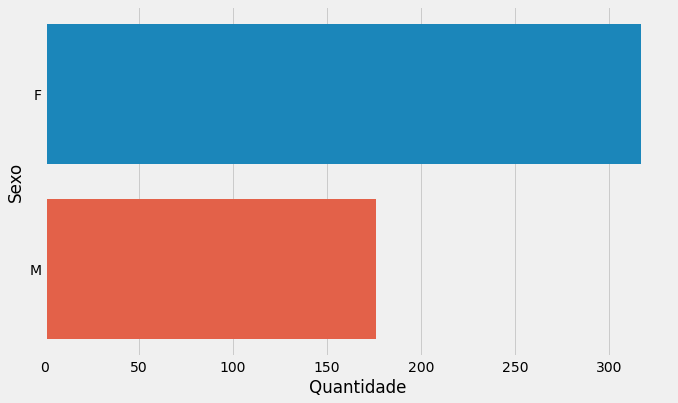

In [187]:
# Quantidade de registros de acordo com sexo da pessoa
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(y = 'Sex' , data = df)
plt.xlabel('Quantidade')
plt.ylabel('Sexo')

plt.show()

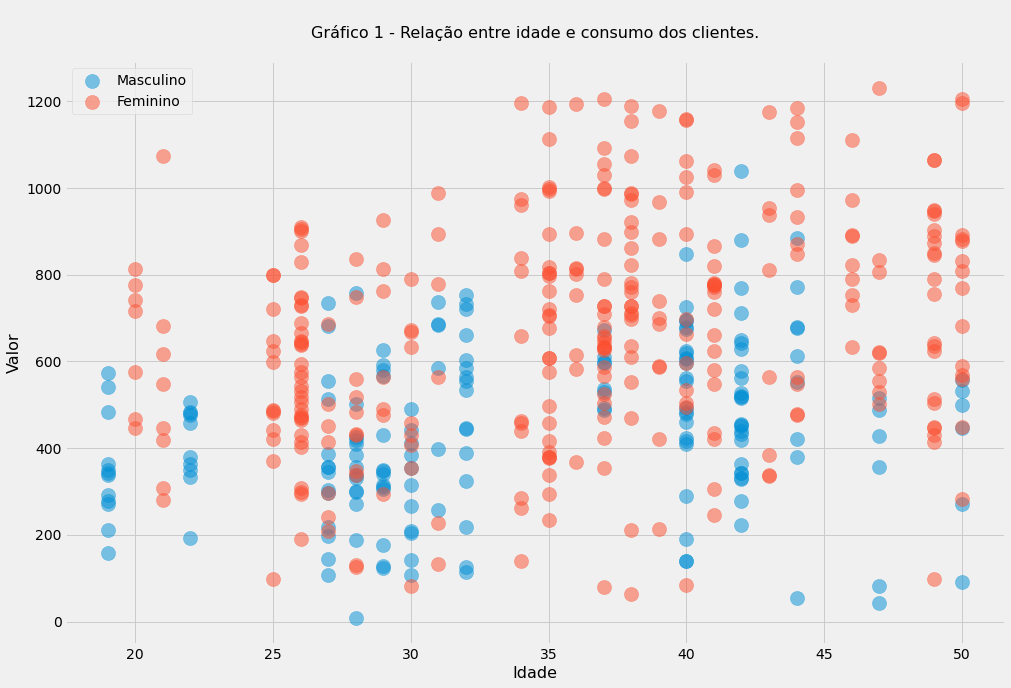

In [191]:
# Gráfico de dispersão para analisar a relação da idade do comprador com o valor comprado
fig, ax = plt.subplots(figsize=(15, 10))

labels = ['Masculino', 'Feminino']

n = 0
for sex in ['M' , 'F']:
    plt.scatter(x = 'Age' , y = 'Value' , data = df[df['Sex'] == sex] ,
                s = 200 , alpha = 0.5 , label = labels[n])
    n += 1

plt.title('\nGráfico 1 - Relação entre idade e consumo dos clientes.\n', fontsize=16)
plt.xlabel('Idade', fontsize=16)
plt.ylabel('Valor', fontsize=16)
plt.legend()
plt.show()

# Exportando o gráfico como imagem
fig.savefig('relacao-entre-idades-e-consumo-dos-clientes.png', bbox_inches='tight', dpi=300)

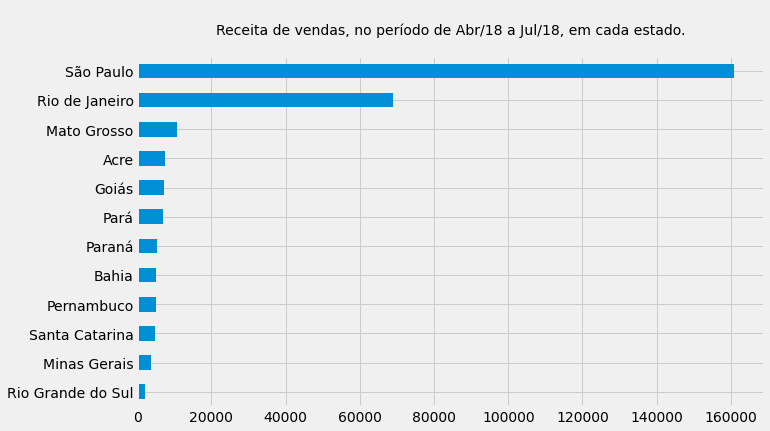

In [192]:
# Gráfico da receita de vendas em cada estado
fig, ax = plt.subplots(figsize=(10, 6))

dados = df.groupby(by=["City"]).sum()
dados['Value'].sort_values().plot(kind='barh')

plt.title('\nReceita de vendas, no período de Abr/18 a Jul/18, em cada estado.\n', fontsize=14)
plt.ylabel('')

plt.show()

# Exportando o gráfico como imagem
fig.savefig('receita-de-vendas-em-cada-estado.png', bbox_inches='tight', dpi=300)

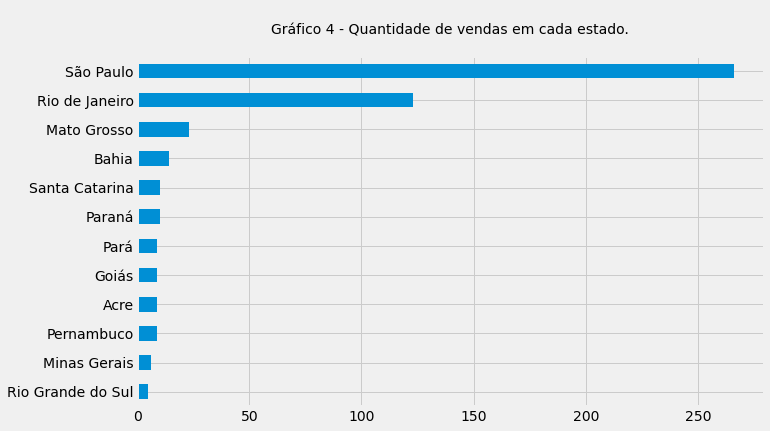

In [193]:
# Quantidade de vendas em cada estado
fig, ax = plt.subplots(figsize=(10, 6))

df['City'].value_counts().plot(kind='barh')
ax.invert_yaxis()

plt.title('\nGráfico 4 - Quantidade de vendas em cada estado.\n', fontsize=14)
plt.ylabel('')

plt.show()

# Exportando o gráfico como imagem
fig.savefig('quantidade-de-vendas-em-cada-estado.png', bbox_inches='tight', dpi=300)

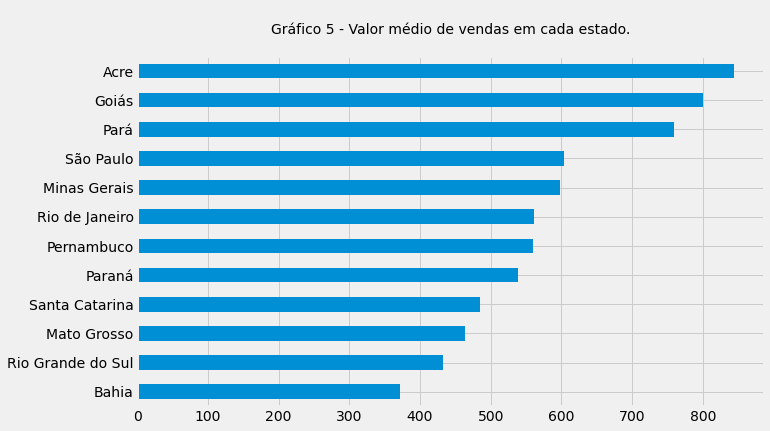

In [194]:
# Gráfico do valor médio de vendas em cada estado
fig, ax = plt.subplots(figsize=(10, 6))

dados = df.groupby(by=["City"]).mean()
dados['Value'].sort_values().plot(kind='barh')

plt.title('\nGráfico 5 - Valor médio de vendas em cada estado.\n', fontsize=14)
plt.ylabel('')

plt.show()

# Exportando o gráfico como imagem
fig.savefig('valor-medio-de-vendas-em-cada-estado.png', bbox_inches='tight', dpi=300)

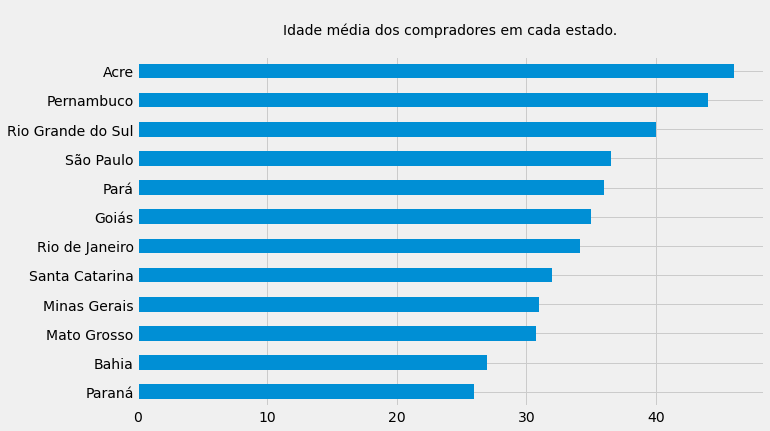

In [195]:
# Gráfico da idade média dos clientes em cada estado
fig, ax = plt.subplots(figsize=(10, 6))

dados['Age'].sort_values().plot(kind='barh')

plt.title('\nIdade média dos compradores em cada estado.\n', fontsize=14)
plt.ylabel('')
plt.show()

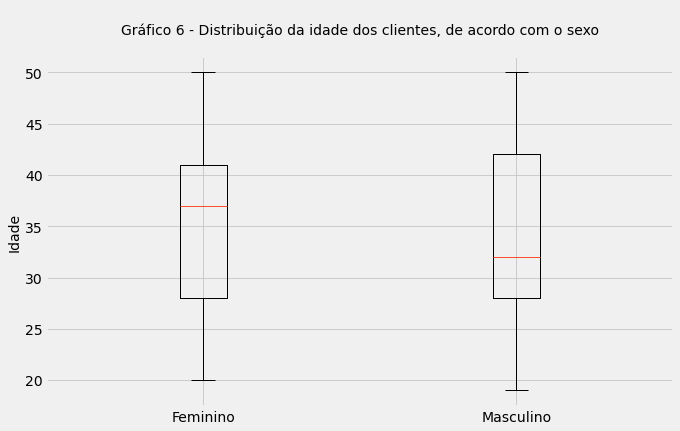

In [196]:
# Boxplot da distribuição das idades de acordo com o sexo do cliente
fig, ax = plt.subplots(figsize=(10, 6))

data_sex_age = {}

data_sex_age['Feminino'] = list(df.loc[df['Sex'] == 'F', 'Age'])
data_sex_age['Masculino'] = list(df.loc[df['Sex'] == 'M', 'Age'])

ax.boxplot(data_sex_age.values())
ax.set_xticklabels(data_sex_age.keys())

plt.title('\nGráfico 6 - Distribuição da idade dos clientes, de acordo com o sexo\n', fontsize=14)
plt.ylabel('Idade', fontsize=14)
plt.show()

# Exportando o gráfico como imagem
fig.savefig('distribuicao-da-idade-dos-clientes.png', bbox_inches='tight', dpi=300)

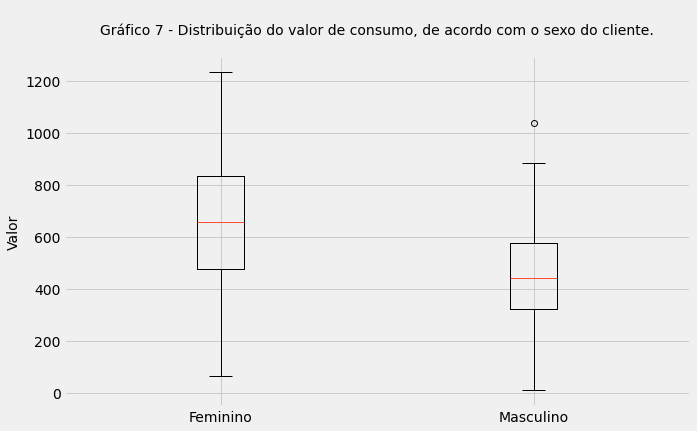

In [197]:
# Boxplot da distribuição do valor de consumo, de acordo com o sexo do cliente
fig, ax = plt.subplots(figsize=(10, 6))

data_sex_age = {}

data_sex_age['Feminino'] = list(df.loc[df['Sex'] == 'F', 'Value'])
data_sex_age['Masculino'] = list(df.loc[df['Sex'] == 'M', 'Value'])

ax.boxplot(data_sex_age.values())
ax.set_xticklabels(data_sex_age.keys())

plt.title('\nGráfico 7 - Distribuição do valor de consumo, de acordo com o sexo do cliente.\n', fontsize=14)
plt.ylabel('Valor', fontsize=14)
plt.show()

# Exportando o gráfico como imagem
fig.savefig('distribuicao-do-valor-de-consumo-dos-clientes.png', bbox_inches='tight', dpi=300)

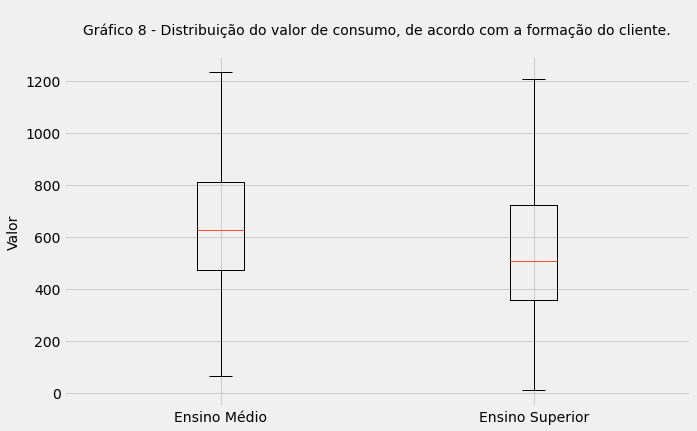

In [198]:
# Boxplot da distribuição do valor de consumo, de acordo com a formação do cliente
fig, ax = plt.subplots(figsize=(10, 6))

data_scholarship = {}

data_scholarship['Ensino Médio'] = list(df.loc[df['Scholarship'] == 'Ensino Médio', 'Value'])
data_scholarship['Ensino Superior'] = list(df.loc[df['Scholarship'] == 'Ensino Superior', 'Value'])

ax.boxplot(data_scholarship.values())
ax.set_xticklabels(data_scholarship.keys())

plt.title('\nGráfico 8 - Distribuição do valor de consumo, de acordo com a formação do cliente.\n', fontsize=14)
plt.ylabel('Valor', fontsize=14)
plt.show()

# Exportando o gráfico como imagem
fig.savefig('distribuicao-do-valor-de-consumo-dos-clientes-formacao.png', bbox_inches='tight', dpi=300)

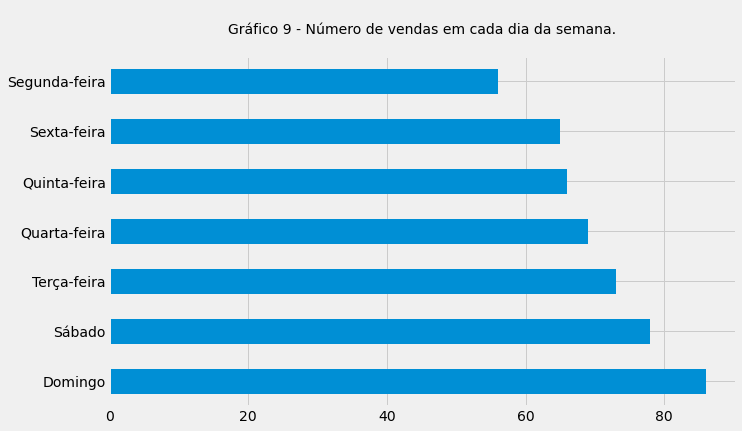

In [147]:
# Gráfico sobre o número de vendas em cada dia da semana
fig, ax = plt.subplots(figsize=(10, 6))

order_date['Date'].dt.strftime('%w').value_counts().plot(kind='barh')

labels = [item.get_text() for item in ax.get_yticklabels()]
labels[0] = 'Domingo'
labels[1] = 'Sábado'
labels[2] = 'Terça-feira'
labels[3] = 'Quarta-feira'
labels[4] = 'Quinta-feira'
labels[5] = 'Sexta-feira'
labels[6] = 'Segunda-feira'
ax.set_yticklabels(labels, fontsize=14)
ax.tick_params(axis='x', labelsize=14)

plt.title('\nGráfico 9 - Número de vendas em cada dia da semana.\n', fontsize=14)
plt.show()

# Exportando o gráfico como imagem
fig.savefig('numero-de-vendas-em-cada-dia-da-semana.png', bbox_inches='tight', dpi=300)